# Segreg Example All Models

In [1]:
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
from numpy.random import default_rng

from segreg import analysis
from segreg.model import OLSRegressionEstimator
from segreg.model import OneBkptSegRegEstimator
from segreg.model import TwoBkptSegRegEstimator

In [2]:
matplotlib.rcParams['legend.numpoints'] = 1
matplotlib.rcParams['figure.figsize'] = (10,5)
matplotlib.rcParams['axes.grid'] = True

## Create a Dataset Based on a Two-Bkpt Function

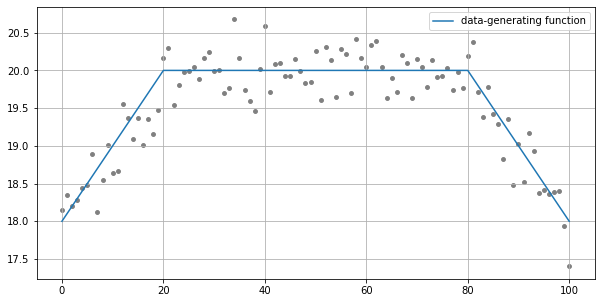

In [3]:
two_bkpt_truth_params = [20, 20, 80, 20, 0.1, -0.1]
truth_func = TwoBkptSegRegEstimator().get_func_for_params(two_bkpt_truth_params)

indep = np.arange(101)
seed = 65434789
rng = default_rng(seed)
dep = truth_func(indep) + 0.3 * rng.standard_normal(len(indep))

plt.scatter(indep, dep, s=15, color="gray");
plt.plot(indep, truth_func(indep));
plt.legend(["data-generating function"]);

## Estimate All Models

In [4]:
ols_estimator = OLSRegressionEstimator()
one_bkpt_estimator = OneBkptSegRegEstimator()
two_bkpt_estimator = TwoBkptSegRegEstimator()

estimators = [ols_estimator, 
              one_bkpt_estimator, 
              two_bkpt_estimator]

for estimator in estimators:
    estimator.fit(indep, dep)

## Plot the Fits

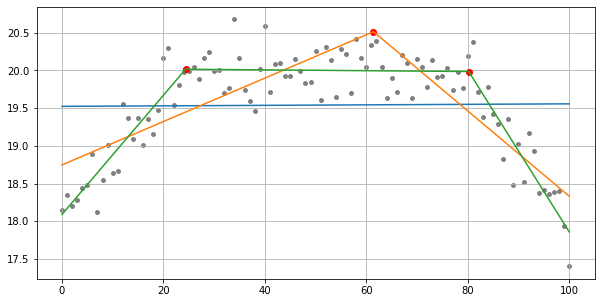

In [5]:
func_arr = [estimator.model_function for estimator in estimators]
u = one_bkpt_estimator.params[0]
u1, u2 = two_bkpt_estimator.params[[0,2]]
extra_pts_arr = [None, [u], [u1, u2]]

analysis.plot_models(func_arr=func_arr,
                     indep=indep,
                     dep=dep,
                     extra_pts_arr=extra_pts_arr,
                     mark_extra_pts=True,
                     scatter_size=15,
                     scatter_color="gray",
                     marker="o");